Dear Prof. Olsthoorn,

It's Paolo Trinchero, a consultant from Spain. Recently I came across your python script for FD modelling of gw flow. Let me say that I was really impressed by the work you did, it's really a wonderful piece of code, quite useful for both applications and teaching.

I have been playing a bit with yout code (fdm_t) trying to customise it for my needs, as I am currently looking at some interference tests conducted in fractured rock. The code works quite nicely for the pumping stage but it gives me some weird results for the recovery (see figure below where the continuous line is the FD solution whereas the dashed line is the Theis solution). The way I implemented a time function for the pumping rate is quite trivial:


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import exp1 as Wt
from mfgrid import  Grid
from inspect import signature
from fdm3t import fdm3t

def newfig(title, xlabel, ylabel, xlim=None, ylim=None, xscale=None, yscale=None, figsize=(8, 6)):
    fig, ax = plt.subplots(1, figsize=figsize)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(ylim)
    if xscale is not None: ax.set_xscale(xscale)
    if yscale is not None: ax.set_yscale(yscale)
    ax.grid()
    return ax


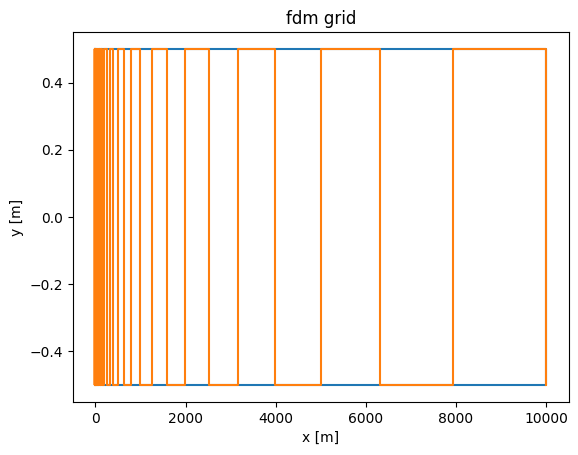

In [17]:
x = np.logspace(-1, 4, 51)
z = [-1, 0]
y = [-1, 1]

gr = Grid(x, y, z, axial=True)
ax = gr.plot_grid()

In [26]:
signature(fdm3t)

<Signature (gr=None, t=None, kxyz=None, c=None, Ss=None, GHB=None, FQ=None, HI=None, IBOUND=None, epsilon=0.67)>

In [27]:
fdm3t(gr=gr, t=t, kxyz=np.const(10.), c=None, Ss=None, GHB=None, FQ=None, HI=gr.const(0), IBOUND=gr.const(1, dtype=int))

NameError: name 't' is not defined

In [57]:
t = np.hstack((np.logspace(-1, 3, 41), 10 ** 3 + np.logspace(-1, 3, 41)))

FQ = gr.const(0); FQ[:, 0, 0] = -650

FQ_well_on  = { 0, FQ[:, 0, 0] = -650}
FQ_well_off = {42, z[:, 0, 0] = 0.
FH = {0: z[:, 0, -1] = 0.

fixedQ = { 0: gr.to_struct_array(FQ_well_0n,   dtype=dtypeFQ),
          10, gr._to_struct_array(FQ_well_off, dtype=dtypeFQ)
         }
fixedH = {0, gr.to_struct_array(FH, dtype=dtypeFH)
         }


SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (459544656.py, line 5)

In [42]:

out = fdm3t(gr=gr, t=t, kxyz=np.const(10.), c=None, Ss=1e-4, GHB=None, FQ=fixedQ, HI=gr.const(0), FH=fixedH, IDOMAIN=gr.const(1, dtype=int))

NameError: name 't' is not defined

In [62]:
z = np.zeros(gr.shape)
z[:, 0, 0] = -650
z

array([[[-650.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.]]])

In [60]:
 np.zeros(gr.shape)[:, 0, 0] = 3

In [48]:
y

2